In [1]:
import pandas as pd
import datetime as dt
from dateutil.relativedelta import relativedelta
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("weather_dataset.csv")
df.drop(df.columns[[0]], axis = 1, inplace = True)
df["Time"]= pd.to_datetime(df["Time"])
d1 = dt.datetime(2017, 1, 1)
d2 = d1+relativedelta(months = 12, hours = -1)
df = df[(df["Time"] >= d1) & (df["Time"] <= d2)]
display(df.head())
display(df.tail())

,Time,T,P,V,O
0,2017-01-01 00:00:00,-31.691195,751.126465,65.845597,0.0041
1,2017-01-01 01:00:00,-31.525667,751.172813,NaN,0.0082
2,2017-01-01 02:00:00,-30.321700,751.509924,NaN,0.0123
3,2017-01-01 03:00:00,-29.215542,751.819648,64.607771,0.0164
4,2017-01-01 04:00:00,-26.919997,752.462401,NaN,0.0205


,Time,T,P,V,O
8755,2017-12-31 19:00:00,-23.526201,753.412664,61.763101,0.0672
8756,2017-12-31 20:00:00,-25.823567,752.769401,62.911784,0.0631
8757,2017-12-31 21:00:00,-28.250361,752.089899,64.125180,0.0590
8758,2017-12-31 22:00:00,-29.125249,751.844930,NaN,0.0549
8759,2017-12-31 23:00:00,-30.628618,751.423987,65.314309,0.0508


In [3]:
df.describe()

,T,P,V,O
count,8760.000000,8760.000000,5232.000000,8760.000000
mean,8.511663,1106.544632,46.971406,0.326317
std,25.437745,5883.771074,9.829482,0.318260
min,-51.414594,751.092925,24.261488,0.004100
25%,-9.316069,757.283873,39.333463,0.050800
50%,5.721943,761.254085,47.751941,0.205000
75%,23.311157,766.002126,54.835739,0.590000
max,632.270354,103149.871908,65.905491,0.959000


<Axes: title={'center': 'Полученная температура воздуха'}, xlabel='Дата', ylabel='???'>

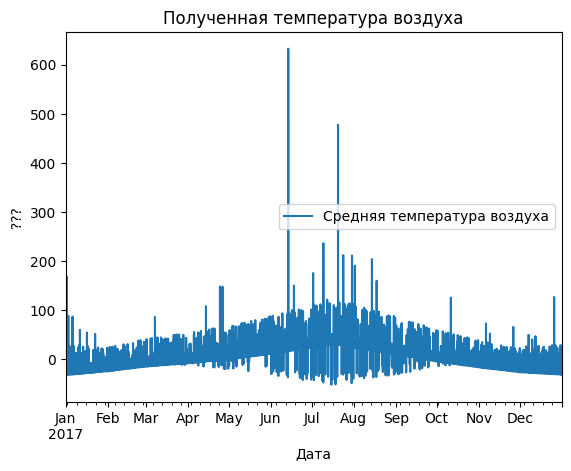

In [4]:
df.plot(x = "Time", y = "T", label = "Средняя температура воздуха", xlabel = "Дата", ylabel = "???", title = "Полученная температура воздуха")

<Axes: title={'center': 'Полученное атмосферное давление'}, xlabel='Дата', ylabel='???'>

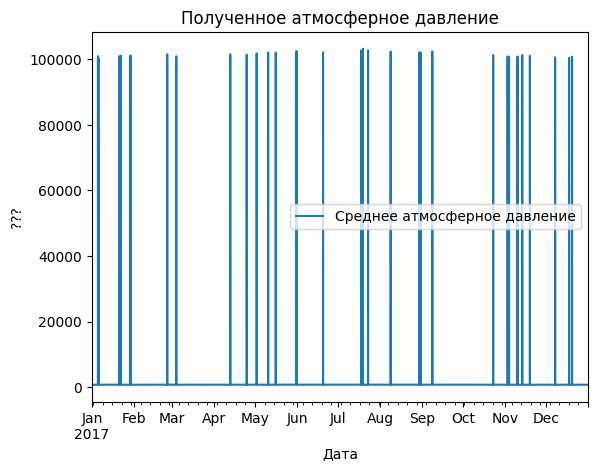

In [5]:
df.plot(x = "Time", y = "P", label = "Среднее атмосферное давление", xlabel = "Дата", ylabel = "???", title = "Полученное атмосферное давление")

<Axes: title={'center': 'Полученная относительная влажность воздуха'}, xlabel='Дата', ylabel='???'>

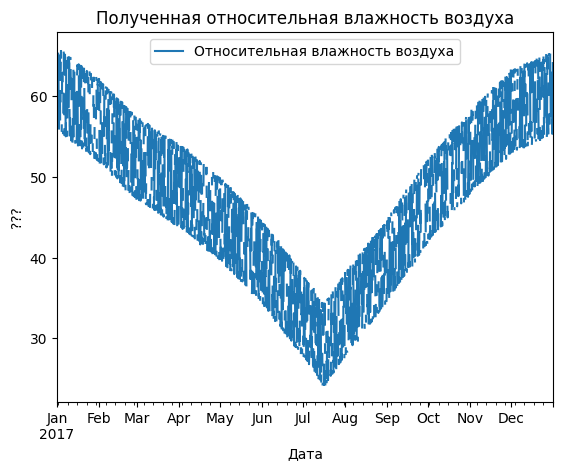

In [6]:
df.plot(x = "Time", y = "V", label = "Относительная влажность воздуха", xlabel = "Дата", ylabel = "???", title = "Полученная относительная влажность воздуха")

<Axes: title={'center': 'Полученная средняя освещённость'}, xlabel='Дата', ylabel='???'>

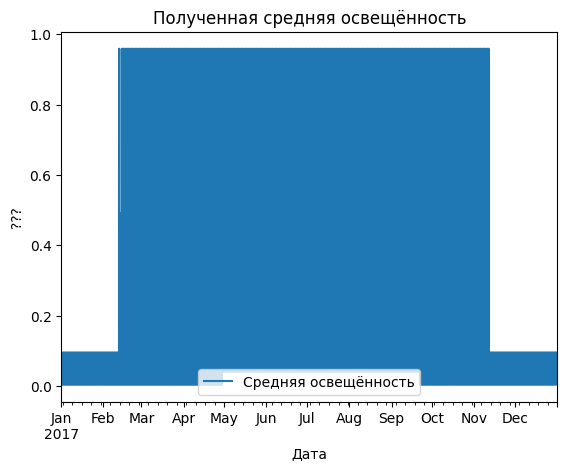

In [7]:
df.plot(x = "Time", y = "O", label = "Средняя освещённость", xlabel = "Дата", ylabel = "???", title = "Полученная средняя освещённость")

<Axes: title={'center': 'Восстановленная относительная влажность воздуха'}, xlabel='Дата', ylabel='Проценты'>

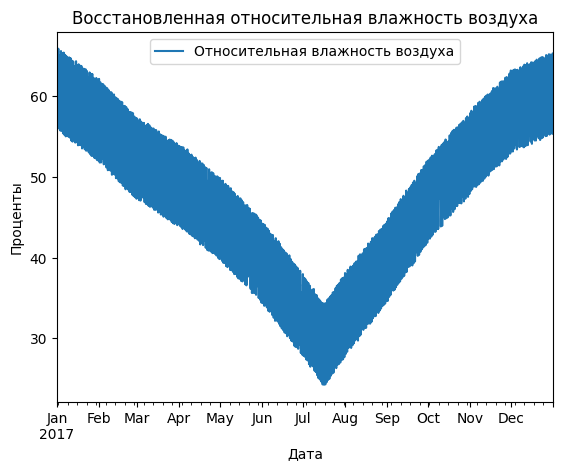

In [8]:
left_value = 79.0
right_value = 79.0
for i in range(df.shape[0]):
  left_value = df.at[i-1, "V"] if i > 0 and not np.isnan(df.at[i-1, "V"]) else right_value
  right_value = df.at[i+1, "V"] if i < df.shape[0]-1 and not np.isnan(df.at[i+1, "V"]) else left_value
  if np.isnan(df.at[i, "V"]):
    df.at[i, "V"] = (left_value+right_value)*0.5
df.plot(x = "Time", y = "V", label = "Относительная влажность воздуха", xlabel = "Дата", ylabel = "Проценты", title = "Восстановленная относительная влажность воздуха")

In [9]:
mask = df["P"] > 1000
display(df[mask])

,Time,T,P,V,O
107,2017-01-05 11:00:00,-11.176507,100907.778033,55.588254,0.0492
115,2017-01-05 19:00:00,-23.027827,100465.365150,60.339683,0.0672
488,2017-01-21 08:00:00,-11.688076,100888.681049,55.844038,0.0369
513,2017-01-22 09:00:00,-9.510467,100969.971740,59.430697,0.0410
682,2017-01-29 10:00:00,-5.893030,101105.011608,52.946515,0.0451
1330,2017-02-25 10:00:00,2.999356,101436.966722,48.500322,0.4510
1490,2017-03-04 02:00:00,-12.725788,100849.942951,56.203018,0.0123
2443,2017-04-12 19:00:00,2.971629,101435.931659,48.514186,0.6720
2734,2017-04-24 22:00:00,32.065670,101326.361925,49.429390,0.5490
2910,2017-05-02 06:00:00,10.802197,101728.248832,49.120263,0.2870


<Axes: title={'center': 'Восстановленное атмосферное давление'}, xlabel='Дата', ylabel='Миллиметр ртутного столба'>

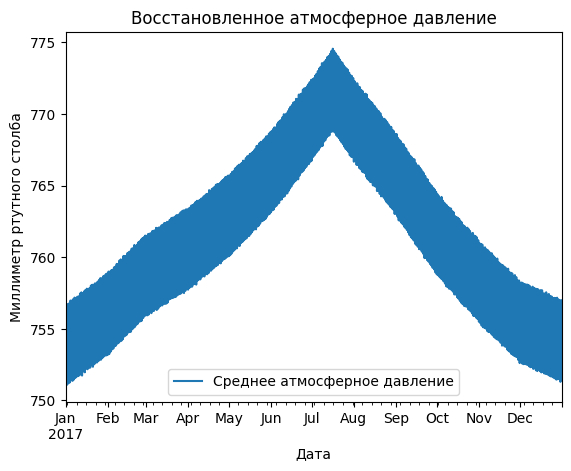

In [10]:
df.loc[mask, "P"] = df.loc[mask, "P"].multiply(0.0075)
left_value = 759
right_value = 759
for i in range(df.shape[0]):
  left_value = df.at[i-1, "P"] if i > 0 and not np.isnan(df.at[i-1, "P"]) else right_value
  right_value = df.at[i+1, "P"] if i < df.shape[0]-1 and not np.isnan(df.at[i+1, "P"]) else left_value
  if np.isnan(df.at[i, "P"]):
    df.at[i, "P"] = (left_value+right_value)*0.5
df.plot(x = "Time", y = "P", label = "Среднее атмосферное давление", xlabel = "Дата", ylabel = "Миллиметр ртутного столба", title = "Восстановленное атмосферное давление")

In [11]:
display(df[df["P"] == df["P"].max()])
display(df[df["V"] == df["V"].min()])

,Time,T,P,V,O
4716,2017-07-16 12:00:00,51.96147,774.549212,24.312551,0.959


,Time,T,P,V,O
4717,2017-07-16 13:00:00,51.477023,774.413567,24.261488,0.918


<Axes: title={'center': 'Почти восстановленная температура воздуха'}, xlabel='Дата', ylabel='Градусы Цельсия'>

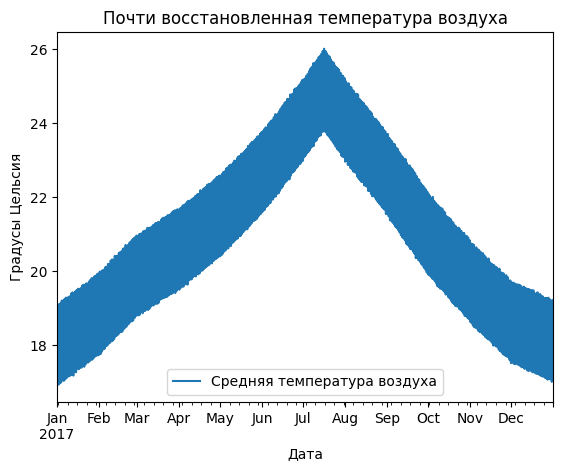

In [12]:
t_max = 26.0+273.15 #Максимальная температура за год в Кельвинах.
p_max = df["P"].max() #Максимальное атмосферное давление в мм рт. ст.
for i in range(df.shape[0]):
  df.at[i, "T"] = (df.at[i, "P"]*t_max/p_max)-273.15 #Восстановление температуры по универсальному газовому закону p1*V1/T1 = p2*V2/T2.
df.plot(x = "Time", y = "T", label = "Средняя температура воздуха", xlabel = "Дата", ylabel = "Градусы Цельсия", title = "Почти восстановленная температура воздуха")

In [13]:
df.describe()

,T,P,V,O
count,8760.000000,8760.000000,8760.000000,8760.000000
mean,21.021433,761.658873,47.042857,0.326317
std,2.122783,5.496238,9.792444,0.318260
min,16.940604,751.092925,24.261488,0.004100
25%,19.324668,757.265665,39.360304,0.050800
50%,20.856281,761.231266,47.848452,0.205000
75%,22.682057,765.958505,54.866510,0.590000
max,26.000000,774.549212,65.905491,0.959000


In [14]:
display(df[df["P"] == df["P"].min()])
display(df[df["V"] == df["V"].max()])

,Time,T,P,V,O
24,2017-01-02,16.940604,751.092925,65.905491,0.0041


,Time,T,P,V,O
24,2017-01-02 00:00:00,16.940604,751.092925,65.905491,0.0041
25,2017-01-02 01:00:00,17.000471,751.247931,65.905491,0.0082
26,2017-01-02 02:00:00,17.088939,751.476991,65.905491,0.0123


<Axes: title={'center': 'Восстановленная температура воздуха'}, xlabel='Дата', ylabel='Градусы Цельсия'>

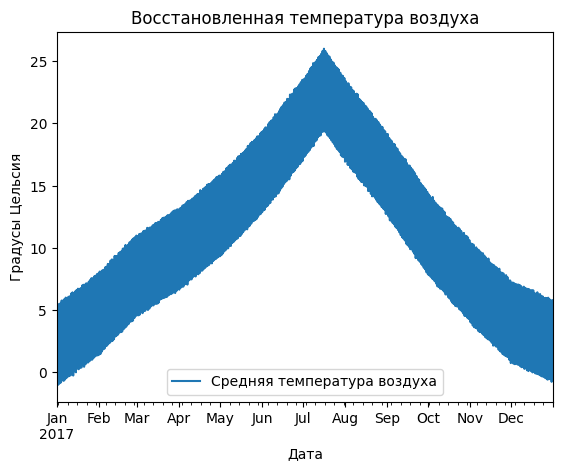

In [15]:
t_min = -1 #Минимальная температура за год в Цельсиях.
t_min_old = df[df["P"] == df["P"].min()]["T"].min()
for i in range(df.shape[0]):
  df.at[i, "T"] = (((df.at[i, "T"]-t_min_old)*(t_max-273.15-t_min))/(t_max-273.15-t_min_old))+t_min #Изменение пределов температуры с (t_min_old; t_max-273.15) на (t_min, t_max-273.15).
df.plot(x = "Time", y = "T", label = "Средняя температура воздуха", xlabel = "Дата", ylabel = "Градусы Цельсия", title = "Восстановленная температура воздуха")

<Axes: title={'center': 'Восстановленная средняя освещённость'}, xlabel='Дата', ylabel='Люкс'>

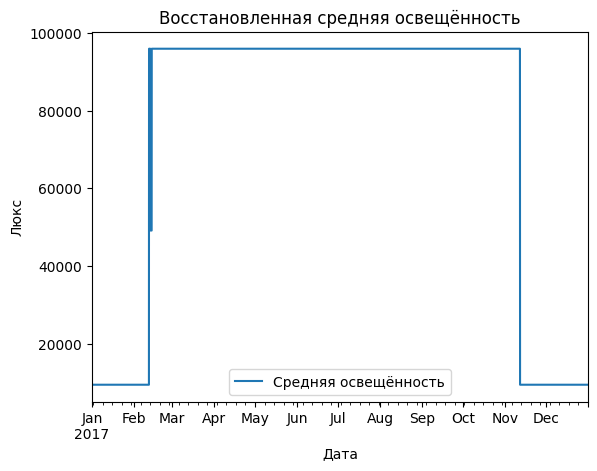

In [16]:
for day_timestamp in pd.date_range(d1, d2, freq = "D"):
  next_day_timestamp = day_timestamp+relativedelta(days = 1)
  day_mask = (df["Time"] >= day_timestamp) & (df["Time"] < next_day_timestamp)
  max_day_illuminance = df[day_mask]["O"].max()*100000.0
  df.loc[day_mask, "O"] = max_day_illuminance
df.plot(x = "Time", y = "O", label = "Средняя освещённость", xlabel = "Дата", ylabel = "Люкс", title = "Восстановленная средняя освещённость")

In [17]:
display(df.describe())

,T,P,V,O
count,8760.000000,8760.000000,8760.000000,8760.000000
mean,11.162223,761.658873,47.042857,74017.205479
std,6.326595,5.496238,9.792444,37482.526205
min,-1.000000,751.092925,24.261488,9590.000000
25%,6.105301,757.265665,39.360304,9590.000000
50%,10.670014,761.231266,47.848452,95900.000000
75%,16.111433,765.958505,54.866510,95900.000000
max,26.000000,774.549212,65.905491,95900.000000


In [18]:
df.to_csv("weather_dataset_restored.csv")